**Problem:** Using a different time series dataset (either from [FRED](https://fred.stlouisfed.org/) or elsewhere), go about the process of time series modeling. Specifically, generate the following deliverables:

- Plot the time series, along with any logical or necessary differences to get a stationary dataset.
- Generate and interpret a PACF for the time series and discuss any differences in correlations.
- Generate five ARIMA specifications and evaluate their efficacy at modeling your data.
- Finally, choose one specification and make a case for it as a logical model for your dataset.

Use text, visuals, and analysis to tell a clear and concise story with your data.

**Analysis:** A good overview of ARIMA Modeling in Time Series Forecasting is described [here](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/). I will follow the analysis described by the author.

A popular and widely used statistical method for time series forecasting is the ARIMA model. ARIMA stands for AutoRegressive Integrated Moving Average and represents a cornerstone in time series forecasting. It is a statistical method that has gained immense popularity due to its efficacy in handling various standard temporal structures present in time series data.

### Autoregressive Integrated Moving Average Model

The [ARIMA](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average) (AutoRegressive Integrated Moving Average) model stands as a statistical powerhouse for analyzing and forecasting time series data.

It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

Let's decode the essence of ARIMA:

- **AR** (Autoregression): This emphasizes the dependent relationship between an observation and its preceding or "lagged" observations.
- **I** (Integrated): To achieve a stationary time series, one that doesn't exhibit trend or seasonality, differencing is applied. It typically involves subtracting an observation from its preceding observation.
- **MA** (Moving Average): This component zeroes in on the relationship between an observation and the residual error from a moving average model based on lagged observations.

Each of these components is explicitly specified in the model as a parameter. A standard notation is used for `ARIMA(p,d,q)` where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:

- **p**: The lag order, representing the number of lag observations incorporated in the model.
- **d**: Degree of differencing, denoting the number of times raw observations undergo differencing.
- **q**: Order of moving average, indicating the size of the moving average window.

A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model.

Interestingly, any of these parameters can be set to 0. Such configurations enable the ARIMA model to mimic the functions of simpler models like ARMA, AR, I, or MA.

Adopting an ARIMA model for a time series assumes that the underlying process that generated the observations is an ARIMA process. This may seem obvious but helps to motivate the need to confirm the assumptions of the model in the raw observations and the residual errors of forecasts from the model.

Next, let's take a look at how we can use the ARIMA model in Python. We will start by loading a simple univariate time series.

### Shampoo Sales Dataset

The [Shampoo Sales dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv) provides a snapshot of monthly shampoo sales spanning three years, resulting in 36 observations. Each observation is a sales count. The genesis of this dataset is attributed to Makridakis, Wheelwright, and Hyndman (1998).

Below is an example of loading the Shampoo Sales dataset with Pandas with a custom function to parse the date-time field. The dataset is baselined in an arbitrary year, in this case 1900.

            Sales
Month            
1901-01-01  266.0
1901-02-01  145.9
1901-03-01  183.1
1901-04-01  119.3
1901-05-01  180.3


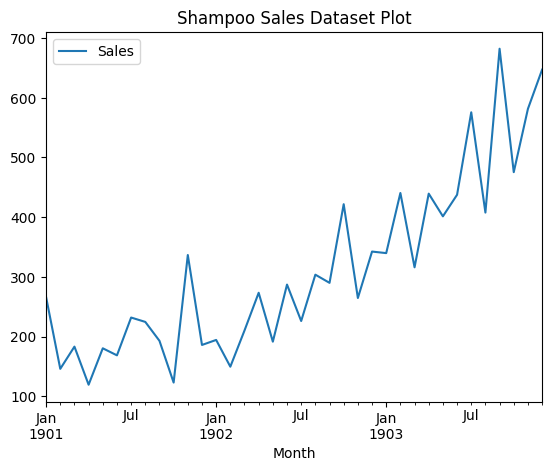

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
print(series.head())
series.plot()
plt.title('Shampoo Sales Dataset Plot')
plt.show()

The data is also plotted as a time series with the month along the $x$-axis and sales figures on the $y$-axis.

We can see that the Shampoo Sales dataset has a clear trend. This suggests that the time series is not stationary and will require differencing to make it stationary, at least a difference order of 1.

Pandas offers a built-in capability to plot autocorrelations. The following example showcases the autocorrelation for an extensive set of time series lags:

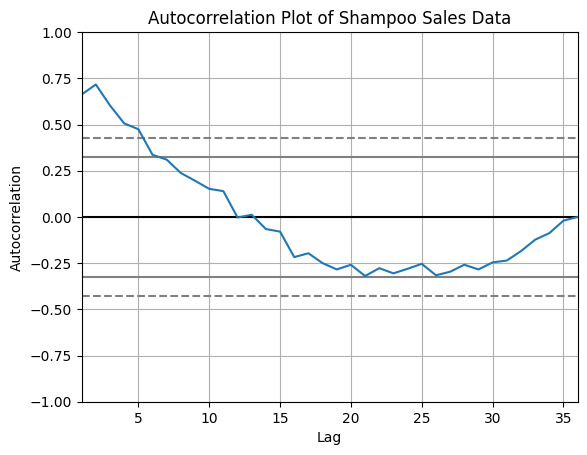

In [2]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
plt.title('Autocorrelation Plot of Shampoo Sales Data')
plt.show()

Running the example, we can see that there is a positive correlation with the first 10-to-12 lags that is perhaps significant for the first 5 lags.

This provides a hint: initiating the AR parameter of our model with a value of 5 could be a beneficial starting point.

### ARIMA with Python

The statsmodels library stands as a vital tool for those looking to harness the power of ARIMA for time series forecasting in Python.

Building an ARIMA Model:

1. **Model Definition:** Initialize the ARIMA model by invoking `ARIMA()` and specifying the `p`, `d`, and `q` parameters.
2. **Model Training:** Train the model on your dataset using the `fit()` method.
3. **Making Predictions:** Generate forecasts by utilizing the `predict()` function and designating the desired time index or indices.

Let's start with something simple. We will fit an ARIMA model to the entire Shampoo Sales dataset and review the residual errors. We'll employ the `ARIMA(5,1,0)` configuration:

- 5 lags for autoregression (AR)
- 1st order differencing (I)
- No moving average term (MA)

In [3]:
# Fix the series index
# series.index = series.index.to_period('M')

Running the example prints a summary of the fit model. This summarizes the coefficient values used as well as the skill of the fit on the on the in-sample observations.

In [4]:
# Fit an ARIMA model and display summary statistics
from statsmodels.tsa.arima.model import ARIMA

# Fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

# Summary of fit model
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Fri, 12 Jan 2024   AIC                            408.969
Time:                        02:57:04   BIC                            418.301
Sample:                    01-01-1901   HQIC                           412.191
                         - 12-01-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

First, we get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

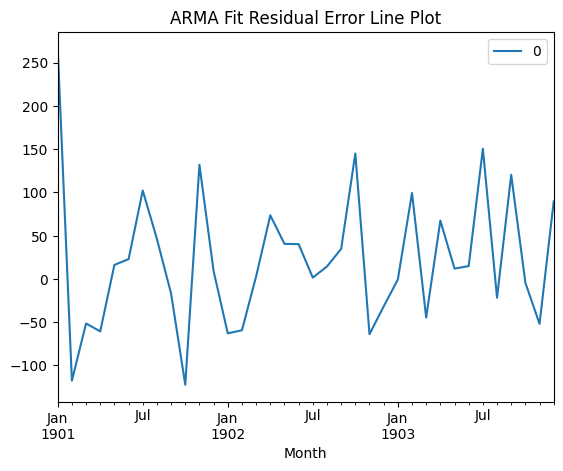

In [5]:
# Line plot of residual errors

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARMA Fit Residual Error Line Plot')
plt.show()

Next, we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.

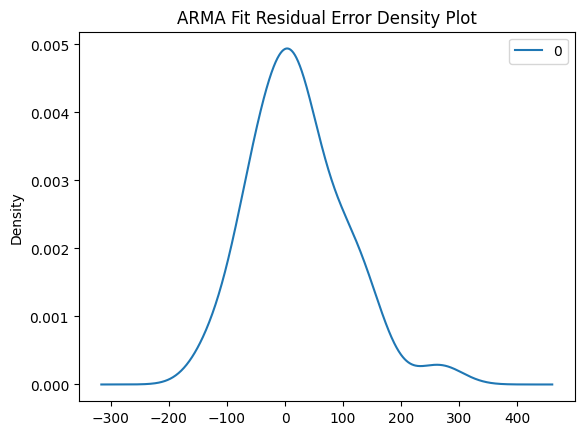

In [6]:
# Density plot of residuals
residuals.plot(kind='kde')
plt.title('ARMA Fit Residual Error Density Plot')
plt.show()

The distribution of the residual errors is displayed. The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals).

In [7]:
# summary stats of residuals
print(residuals.describe())

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


Note, that although we used the entire dataset for time series analysis, ideally we would perform this analysis on just the training dataset when developing a predictive model.

Next, let's look at how we can use the ARIMA model to make forecasts.

### Rolling Forecast ARIMA Model

The ARIMA model can be used to forecast future time steps.

The ARIMA model is adept at forecasting future time points. In a rolling forecast, the model is often retrained as new data becomes available, allowing for more accurate and adaptive predictions.

We can use the `predict()` function on the [ARIMAResults](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.html) object to make predictions. It accepts the index of the time steps to make predictions as arguments. These indexes are relative to the start of the training dataset used to make predictions.

How to Forecast with ARIMA:

1. Use the `predict()` function on the ARIMAResults object. This function requires the index of the time steps for which predictions are needed.
2. To revert any differencing and return predictions in the original scale, set the type argument to "levels".
3. For a simpler one-step forecast, employ the `forecast()` function.

We can split the training dataset into train and test sets, use the train set to fit the model and generate a prediction for each element on the test set.

A rolling forecast is required given the dependence on observations in prior time steps for differencing and the AR model. A crude way to perform this rolling forecast is to re-create the ARIMA model after each new observation is received.

We manually keep track of all observations in a list called history that is seeded with the training data and to which new observations are appended each iteration.

Putting this all together, below is an example of a rolling forecast with the ARIMA model in Python.

Running the example prints the prediction and expected value each iteration.

In [8]:
# Split data into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# Walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220221, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231275, expected=475.300000
predicted=672.914944, expected=581.300000
predicted=531.541449, expected=646.900000


We can also calculate a final root mean squared error score (RMSE) for the predictions, providing a point of comparison for other ARIMA configurations.

In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 89.021


We will also create a line plot to show the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale.

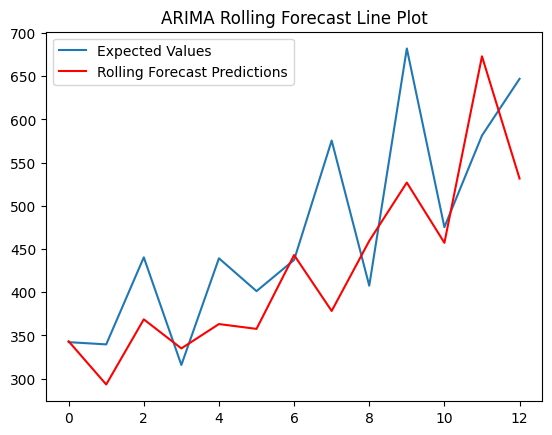

In [10]:
# Plot forecasts against actual outcomes
plt.plot(test, label='Expected Values')
plt.plot(predictions, color='red',  label='Rolling Forecast Predictions')
plt.title('ARIMA Rolling Forecast Line Plot')
plt.legend()
plt.show()

The model could use further tuning of the `p`, `d`, and maybe even the `q` parameters.

### Configuring an ARIMA Model

ARIMA is often configured using the classical [Box-Jenkins Methodology](https://en.wikipedia.org/wiki/Box%E2%80%93Jenkins_method). This process employs a meticulous blend of time series analysis and diagnostics to pinpoint the most fitting parameters for the ARIMA model.

The Box-Jenkins Methodology:

1. **Model Identification:** Begin with visual tools like plots and leverage summary statistics. These aids help recognize trends, seasonality, and autoregressive elements. The goal here is to gauge the extent of differencing required and to determine the optimal lag size.
2. **Parameter Estimation:** This step involves a fitting procedure tailored to derive the coefficients integral to the regression model.
3. **Model Checking:** Armed with plots and statistical tests delve into the residual errors. This analysis illuminates the temporal structure that the model might have missed.

The process is repeated until either a desirable level of fit is achieved on the in-sample or out-of-sample observations (e.g. training or test datasets).

The process was described in the classic 1970 textbook on the topic titled [Time Series Analysis: Forecasting and Control](https://amzn.to/31OLnFH) by George Box and Gwilym Jenkins. An updated 5th edition is now available if you are interested in going deeper into this type of model and methodology.

Given that the model can be fit efficiently on modest-sized time series datasets, grid searching parameters of the model can be a valuable approach.

We will now use grid search to find the [optimal hyperparameters of the ARIMA model](https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/).

### Grid Searching Method



Diagnostic plots of the time series can be used along with heuristic rules to determine the hyperparameters of the ARIMA model.

These are good in most, but perhaps not all, situations.

We can automate the process of training and evaluating ARIMA models on different combinations of model hyperparameters. In machine learning this is called a grid search or model tuning.

We will develop a method to grid search ARIMA hyperparameters for a one-step rolling forecast. The approach is broken down into two parts:

1. Evaluate an ARIMA model.
2. Evaluate sets of ARIMA parameters.


### 1. Evaluate an ARIMA model.

We can evaluate an ARIMA model by preparing it on a training dataset and evaluating predictions on a test dataset.

This approach involves the following steps:

1. Split the dataset into training and test sets.
2. Walk the time steps in the test dataset.
  1. Train an ARIMA model.
  2. Make a one-step prediction.
  3. Store prediction; get and store actual observation.
3. Calculate error score for predictions compared to expected values.

We can implement this in Python as a new standalone function called `evaluate_arima_model()` that takes a time series dataset as input as well as a tuple with the `p`, `d`, and `q` parameters for the model to be evaluated.

The dataset is split in two: 66% for the initial training dataset and the remaining 34% for the test dataset.

Each time step of the test set is iterated. Just one iteration provides a model that you could use to make predictions on new data. The iterative approach allows a new ARIMA model to be trained each time step.

A prediction is made each iteration and stored in a list. This is so that at the end of the test set, all predictions can be compared to the list of expected values and an error score calculated. In this case, a mean squared error score is calculated and returned.

In [11]:
# Evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
 # Prepare training dataset
 train_size = int(len(X) * 0.66)
 train, test = X[0:train_size], X[train_size:]
 history = [x for x in train]

 # Make predictions
 predictions = list()
 for t in range(len(test)):
  model = ARIMA(history, order=arima_order)
  model_fit = model.fit()
  yhat = model_fit.forecast()[0]
  predictions.append(yhat)
  history.append(test[t])

 # Calculate out of sample error
 error = mean_squared_error(test, predictions)
 return error

Now that we know how to evaluate one set of ARIMA hyperparameters, let's see how we can call this function repeatedly for a grid of parameters to evaluate.

### 2. Iterate ARIMA Parameters

Evaluating a suite of parameters is relatively straightforward.

The user must specify a grid of `p`, `d`, and `q` ARIMA parameters to iterate. A model is created for each parameter and its performance evaluated by calling the `evaluate_arima_model()` function described in the previous section.

The function must keep track of the lowest error score observed and the configuration that caused it. This can be summarized at the end of the function with a print to standard out.

We can implement this function called `evaluate_models()` as a series of four loops.

There are two additional considerations. The first is to ensure the input data are floating point values (as opposed to integers or strings), as this can cause the ARIMA procedure to fail.

Second, the statsmodels ARIMA procedure internally uses numerical optimization procedures to find a set of coefficients for the model. These procedures can fail, which in turn can throw an exception. We must catch these exceptions and skip those configurations that cause a problem.

Additionally, we will avoid warnings which will generate a lot of noise.

In [12]:
import warnings
warnings.filterwarnings("ignore")

Finally, even with all of these protections, the underlying C and Fortran libraries may still report warnings to standard out. We will ignore these.

The complete procedure for evaluating a grid of ARIMA hyperparameters is listed below.

In [13]:
# Evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
 dataset = dataset.astype('float32')
 best_score, best_cfg = float("inf"), None

 for p in p_values:
  for d in d_values:
    for q in q_values:
      order = (p,d,q)
      try:
        mse = evaluate_arima_model(dataset, order)
        if mse < best_score:
          best_score, best_cfg = mse, order
          print('ARIMA%s MSE=%.3f' % (order,mse))
      except:
        continue
 print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

Now that we have a procedure to grid search ARIMA hyperparameters, let's test the procedure on two univariate time series problems.

We will start with the Shampoo Sales dataset.

### Grid Search: Shampoo Sales Dataset

We can specify a site of `p`, `d`, and `q` values to search and pass them to the `evaluate_models()` function.

We will try a suite of lag values (`p`) and just a few difference iterations (`d`) and residual error lag values (`q`).

In [14]:
# Evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=52425.271
ARIMA(0, 0, 1) MSE=38257.790
ARIMA(0, 0, 2) MSE=23989.679
ARIMA(0, 1, 0) MSE=17730.518
ARIMA(0, 1, 1) MSE=10831.968
ARIMA(0, 1, 2) MSE=4671.011
ARIMA(1, 2, 2) MSE=4291.639
Best ARIMA(1, 2, 2) MSE=4291.639


Running the example prints the ARIMA parameters and MSE for each successful evaluation completed.

The best parameters of `ARIMA(1, 2, 2)` are reported at the end of the run with a mean squared error of `4,291.639`.

### Grid Search: Daily Female Births Case Study

The [Daily Female Births dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv) describes the number of daily female births in California in 1959.

The units are a count and there are 365 observations. The source of the dataset is credited to Newton (1988).

Following the procedure shown above, we will download the dataset into a dataframe and perform grid search to find the best ARIMA hyperparameters.

In [ ]:
# Load dataset
birth_series = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv', header=0, index_col=0)

# Evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(birth_series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=67.063
ARIMA(0, 0, 1) MSE=62.165
ARIMA(0, 0, 2) MSE=60.384
ARIMA(0, 1, 1) MSE=55.160
ARIMA(0, 1, 2) MSE=54.048
ARIMA(1, 1, 1) MSE=53.882
ARIMA(1, 1, 2) MSE=53.720
ARIMA(4, 1, 2) MSE=53.594
ARIMA(6, 1, 0) MSE=53.007


Running the example prints the ARIMA parameters and mean squared error for each configuration successfully evaluated.

The best mean parameters are reported as `ARIMA(6, 1, 0)` with a mean squared error of `53.007`.

### Extensions

The grid search method used in this tutorial is simple and can easily be extended. This section lists some ideas to extend the approach which one can explore.

* **Seed Grid**. The classical diagnostic tools of ACF and PACF plots can still be used with the results used to seed the grid of ARIMA parameters to search.
* **Alternate Measures**. The search seeks to optimize the out-of-sample mean squared error. This could be changed to another out-of-sample statistic, an in-sample statistic, such as AIC or BIC, or some combination of the two. You can choose a metric that is most meaningful on your project.
* **Residual Diagnostics**. Statistics can automatically be calculated on the residual forecast errors to provide an additional indication of the quality of the fit. Examples include statistical tests for whether the distribution of residuals is Gaussian and whether there is an autocorrelation in the residuals.
* **Update Model**. The ARIMA model is created from scratch for each one-step forecast. With careful inspection of the API, it may be possible to update the internal data of the model with new observations rather than recreating it from scratch.
* Preconditions. The ARIMA model can make assumptions about the time series dataset, such as normality and stationarity. These could be checked and a warning raised for a given of a dataset prior to a given model being trained.
